In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.simplefilter('ignore')
warnings.filterwarnings("default", category=DeprecationWarning, module="__main__")
warnings.filterwarnings("default", category=PendingDeprecationWarning, module="__main__")
%matplotlib inline

In [3]:
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 
    header=0,
    sep=';')

In [31]:
#df_wine.columns = ['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']

In [5]:
print('quality', np.unique(df_wine['quality']))

quality [3 4 5 6 7 8 9]


In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


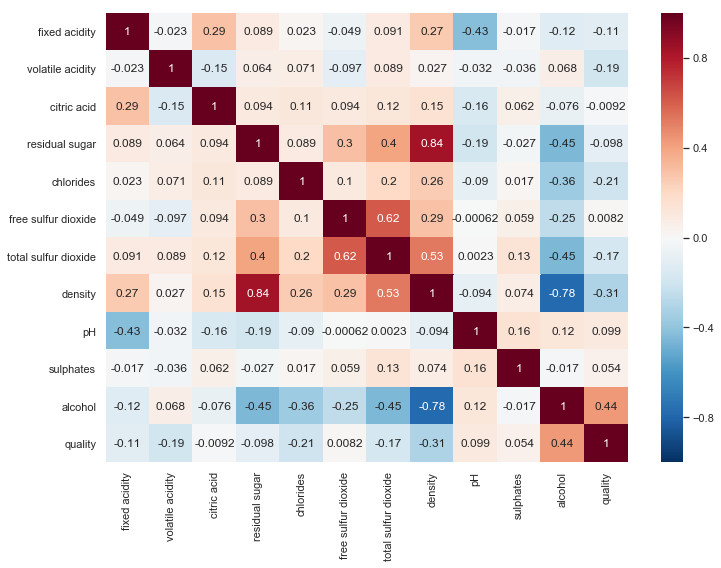

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = df_wine[df_wine.columns].corr()
sns.heatmap(corr, linewidths=0, vmin=-1, cmap="RdBu_r", annot = True)

In [10]:
n_wines = df_wine.shape[0]
# Number of wines with quality rating above 6
quality_above_6 = df_wine.loc[(df_wine['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]
# Number of wines with quality rating below 5
quality_below_5 = df_wine.loc[(df_wine['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]
# Number of wines with quality rating between 5 to 6
quality_between_5 = df_wine.loc[(df_wine['quality'] >= 5) & (df_wine['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]
# Percentage of wines with quality rating above 6
greater_percent = n_above_6*100/n_wines
# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))
# Some more additional data analysis
display(np.round(df_wine.describe()))

Total number of wine data: 4898
Wines with rating 7 and above: 1060
Wines with rating less than 5: 183
Wines with rating 5 and 6: 3655
Percentage of wines with quality 7 and above: 21.64%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,138.0,1.0,3.0,0.0,11.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,42.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,2.0,9.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,108.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,134.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,167.0,1.0,3.0,1.0,11.0,6.0
max,14.0,1.0,2.0,66.0,0.0,289.0,440.0,1.0,4.0,1.0,14.0,9.0


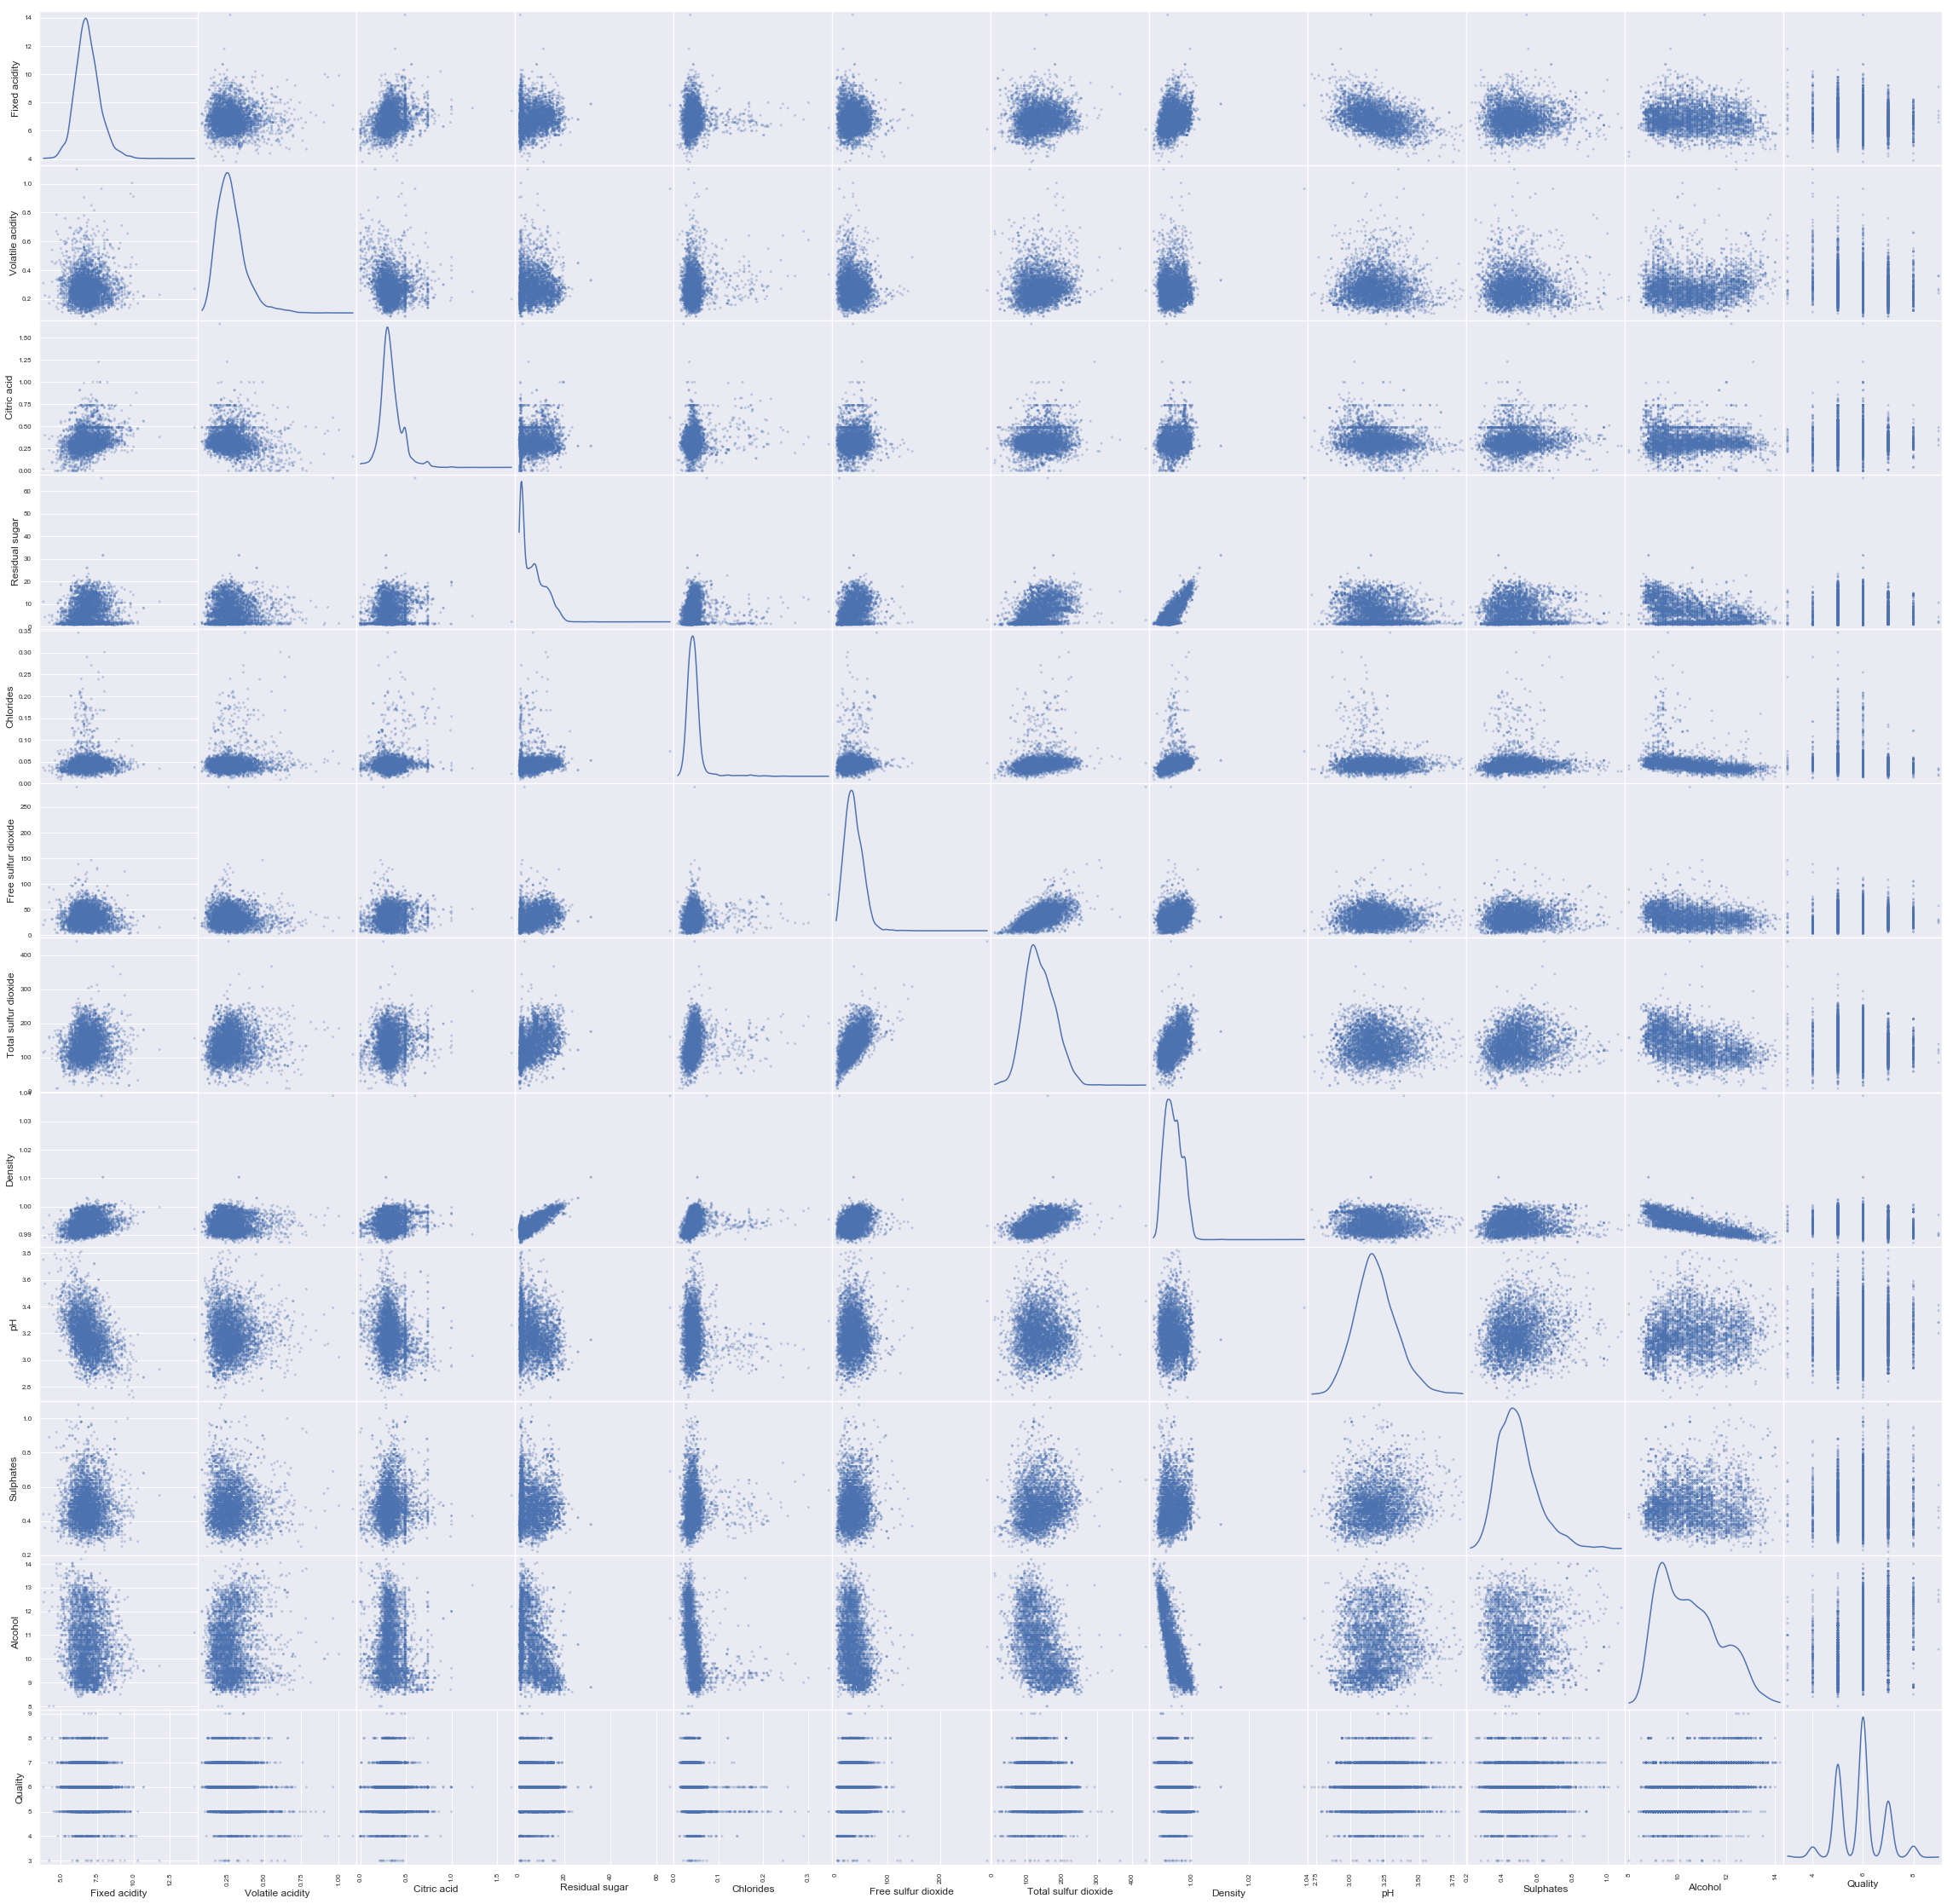

In [10]:
pd.plotting.scatter_matrix(df_wine, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

In [11]:
#Visualize the co-relation between pH and fixed Acidity
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = df_wine[['pH', 'fixed acidity']]
fixedAcidity_pH.head()

,pH,fixed acidity
0,3.00,7.0
1,3.30,6.3
2,3.26,8.1
3,3.19,7.2
4,3.19,7.2


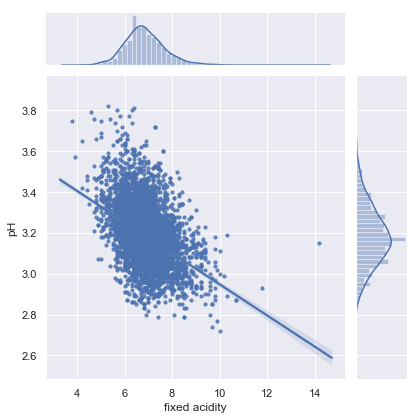

In [12]:
#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

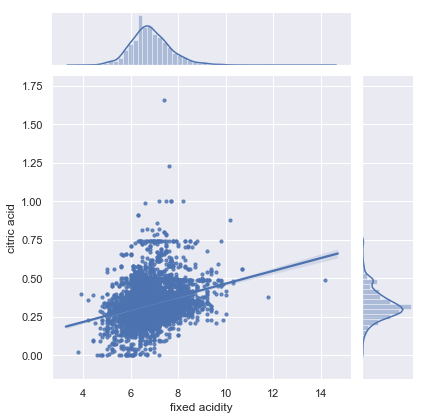

In [13]:
fixedAcidity_citricAcid = df_wine[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

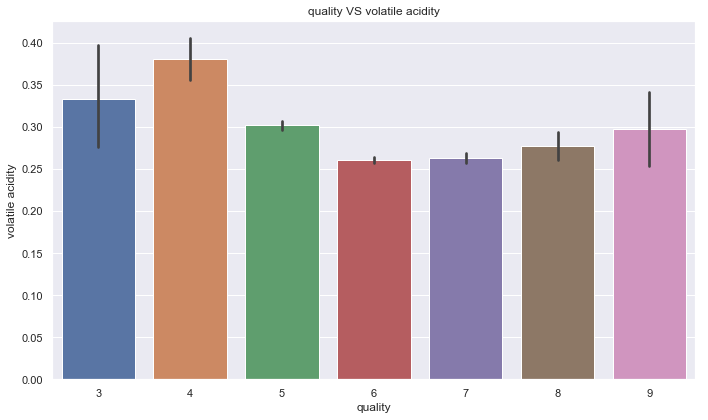

<Figure size 842.4x595.44 with 0 Axes>

In [14]:
volatileAcidity_quality = df_wine[['quality', 'volatile acidity']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')
plt.tight_layout()
plt.show()
plt.gcf().clear()

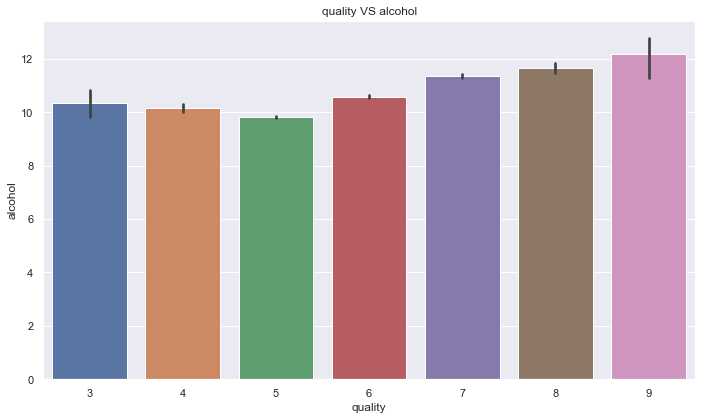

<Figure size 842.4x595.44 with 0 Axes>

In [16]:
quality_alcohol = df_wine[['quality', 'alcohol']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')
plt.tight_layout()
plt.show()
plt.gcf().clear()

In [17]:
# For each feature find the data points with extreme high or low values
for feature in df_wine.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df_wine[feature], q=25)
 
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df_wine[feature], q=75)
 
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
 
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df_wine[~((df_wine[feature] >= Q1 - step) & (df_wine[feature] <= Q3 + step))])

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
358,10.0,0.200,0.39,1.40,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
551,9.2,0.250,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
555,9.2,0.250,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
656,9.0,0.270,0.35,4.90,0.028,27.0,95.0,0.99320,3.04,0.40,11.3,6
774,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
847,9.2,0.340,0.27,1.20,0.026,17.0,73.0,0.99210,3.08,0.39,10.8,5


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
20,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
23,7.6,0.670,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.300000,5
79,6.7,0.540,0.28,5.40,0.060,21.0,105.0,0.99490,3.27,0.37,9.000000,5
147,6.4,0.595,0.14,5.20,0.058,15.0,97.0,0.99510,3.38,0.36,9.000000,4
178,6.0,0.670,0.07,1.20,0.060,9.0,108.0,0.99310,3.11,0.35,8.700000,4
188,6.8,0.530,0.35,3.80,0.034,26.0,109.0,0.99060,3.26,0.57,12.700000,8
202,6.9,0.540,0.32,13.20,0.050,53.0,236.0,0.99730,3.20,0.50,9.600000,5
208,6.8,0.570,0.29,2.20,0.040,15.0,77.0,0.99380,3.32,0.74,10.200000,5
221,7.2,0.685,0.21,9.50,0.070,33.0,172.0,0.99710,3.00,0.55,9.100000,6


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
16,6.3,0.480,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.60,6
54,6.8,0.200,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.10,6
62,7.0,0.470,0.07,1.10,0.035,17.0,151.0,0.99100,3.02,0.34,10.50,5
65,6.2,0.350,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.10,5
84,7.1,0.430,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.70,5
85,7.1,0.440,0.62,11.80,0.044,52.0,152.0,0.99750,3.12,0.46,8.70,6
86,7.2,0.390,0.63,11.00,0.044,55.0,156.0,0.99740,3.09,0.44,8.70,6
88,7.1,0.430,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.70,5
89,7.1,0.440,0.62,11.80,0.044,52.0,152.0,0.99750,3.12,0.46,8.70,6


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
23,7.6,0.670,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,5
35,7.3,0.280,0.43,1.70,0.080,21.0,123.0,0.99050,3.19,0.42,12.80,5
40,6.7,0.230,0.39,2.50,0.172,63.0,158.0,0.99370,3.11,0.36,9.40,6
41,6.7,0.240,0.39,2.90,0.173,63.0,157.0,0.99370,3.10,0.34,9.40,6
54,6.8,0.200,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.10,6
60,6.8,0.220,0.24,4.90,0.092,30.0,123.0,0.99510,3.03,0.46,8.60,6
110,6.5,0.170,0.54,8.50,0.082,64.0,163.0,0.99590,2.89,0.39,8.80,6
124,6.4,0.130,0.47,1.60,0.092,40.0,158.0,0.99280,3.21,0.36,9.80,6
194,6.4,0.290,0.44,3.60,0.200,75.0,181.0,0.99420,3.02,0.41,9.10,5
195,6.4,0.300,0.45,3.50,0.197,76.0,180.0,0.99420,3.02,0.39,9.10,6


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.99870,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
1940,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
1942,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
2127,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2378,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.270,0.28,4.80,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
115,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
250,5.9,0.210,0.28,4.60,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
320,6.0,0.100,0.24,1.10,0.041,15.0,65.0,0.99270,3.61,0.61,10.3,7
507,6.0,0.240,0.27,1.90,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
509,6.0,0.240,0.27,1.90,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
830,7.3,0.205,0.31,1.70,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
834,7.3,0.205,0.31,1.70,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
892,5.9,0.260,0.30,1.00,0.036,38.0,114.0,0.99280,3.58,0.48,9.4,5
928,6.5,0.250,0.35,12.00,0.055,47.0,179.0,0.99800,3.58,0.47,10.0,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.8,0.220,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.600000,6
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.700000,6
209,6.1,0.400,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.500000,6
245,6.1,0.180,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.300000,6
339,6.6,0.180,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.200000,7
357,6.1,0.360,0.33,1.1,0.050,24.0,169.0,0.99270,3.15,0.78,9.500000,6
411,7.3,0.280,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.600000,6
415,7.3,0.280,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.600000,6
530,6.4,0.100,0.35,4.9,0.048,31.0,103.0,0.99470,3.43,0.79,9.700000,6
563,7.4,0.300,0.22,1.4,0.046,16.0,135.0,0.99280,3.08,0.77,10.400000,7


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
158,5.2,0.440,0.04,1.4,0.036,43.0,119.0,0.98940,3.36,0.33,12.1,8
159,5.2,0.440,0.04,1.4,0.036,43.0,119.0,0.98940,3.36,0.33,12.1,8
188,6.8,0.530,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8
251,8.5,0.260,0.21,16.2,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
253,5.8,0.240,0.44,3.5,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3


In [18]:
# OPTIONAL: Select the indices for data points you wish to remove
#outliers = []
# Remove the outliers, if any were specified
# good_data = df_wine.drop(df_wine.index[outliers]).reset_index(drop = True)
# display(np.round(good_data.describe()))

In [19]:
# convert our regression problem into a classification problem

# Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
# 0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
df_wine['quality_categorical'] = pd.cut(df_wine['quality'], bins=bins, labels=quality_labels, include_lowest=True)

# Displays the first 2 columns
display(df_wine.head(n=2))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [20]:
# Split the data into features and target label
quality_raw = df_wine['quality_categorical']
quality_raw.head()

0    1
1    1
2    1
3    1
4    1
Name: quality_categorical, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [21]:
features_raw = df_wine.drop(['quality', 'quality_categorical'], axis = 1)
features_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [22]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, quality_raw, test_size = 0.2, random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3918 samples.
Testing set has 980 samples.


In [23]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import time

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
        - learner: the learning algorithm to be trained and predicted on
        - sample_size: the size of samples (number) to be drawn from the training set
        - X_train: features training set
        - y_train: quality training set
        - X_test: features testing set
        - y_test: quality testing set
    '''
    
    results = {}
    
    """
    Fit/train the learner to the training data using slicing with 'sample size'
    using .fit(training_features[:], training_labels[:])
    """
    start = time() # get start time of training
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size]) # train the model
    end = time() # get end time of training
    
    # Calculate the training time
    results['train_time'] = end - start
    
    """
    Get the predictions on the first 300 training samples(X_train),
    and also predictions on the test set(X_test) using .predict()
    """
    start = time() # get start time
    predictions_train = learner.predict(X_train[:300])
    predictions_test = learner.predict(X_test)
    end = time() # get end time
    
    # Calculate the total prediction time
    results['prediction_time'] = end - start
    
    # Compute accuracy on the first 300 training samples
    results['accuracy_train'] = accuracy_score(y_train[:300], predictions_train)
    
    # Compute accuracy on test set
    results['accuracy_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F1-score on the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
    
    # Compute F1-score on test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
    
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results

In [24]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm

def distribution(data, feature_label, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    sns.set()
    sns.set_style("whitegrid")
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate([feature_label]):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel(feature_label)
        ax.set_ylabel("Total Number")
        ax.set_ylim((0, 1500))
        ax.set_yticks([0, 200, 400, 600, 800])
        ax.set_yticklabels([0, 200, 400, 600, 800, ">1000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

def visualize_classification_performance(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - results: a list of dictionaries of the statistic results from 'train_predict_evaluate()'
    """
  
    # Create figure
    sns.set()
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(2, 3, figsize = (11,7))
    # print("VERSION:")
    # print(matplotlib.__version__)
    # Constants
    bar_width = 0.3
    colors = ["#e55547", "#4e6e8e", "#2ecc71"]
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'accuracy_train', 'f_train', 'prediction_time', 'accuracy_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    # plt.tight_layout(pad=1, w_pad=2, h_pad=5.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
    
def feature_plot(importances, X_train, y_train, columns):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    values = importances[indices][:11]

    sns.set()
    sns.set_style("whitegrid")

    # Creat the plot
    fig = plt.figure(figsize = (12,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(11), values, width = 0.2, align="center", label = "Feature Weight")
    # plt.bar(np.arange(11) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
    #       label = "Cumulative Feature Weight")
    plt.xticks(np.arange(11), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

# models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
# models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
# models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
# models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
# models.append(("eXtreme Gradient Boost:",XGBClassifier()))
# models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
# models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
# models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


GaussianNB trained on 39 samples.
GaussianNB trained on 391 samples.
GaussianNB trained on 3918 samples.
DecisionTreeClassifier trained on 39 samples.
DecisionTreeClassifier trained on 391 samples.
DecisionTreeClassifier trained on 3918 samples.
RandomForestClassifier trained on 39 samples.
RandomForestClassifier trained on 391 samples.
RandomForestClassifier trained on 3918 samples.


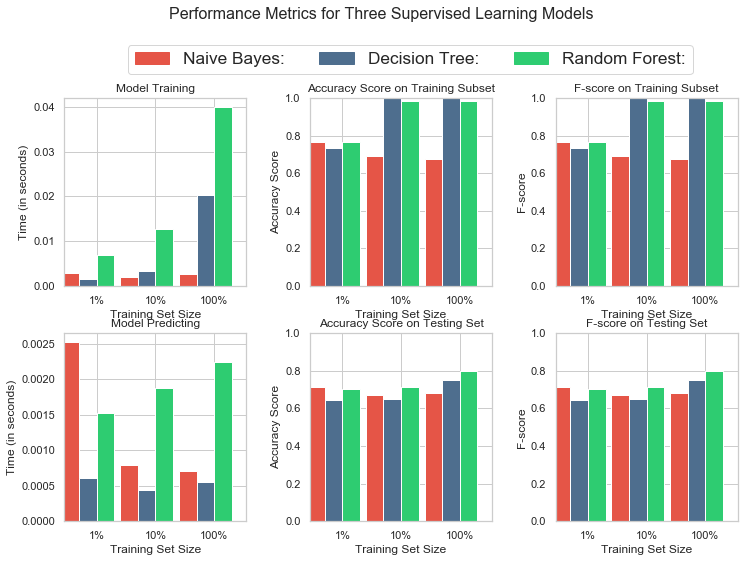

In [26]:
results = {}

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

for name, model in models:
    results[name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[name][i] = train_predict_evaluate(model, samples, X_train, y_train, X_test, y_test)
# print(results)
visualize_classification_performance(results)

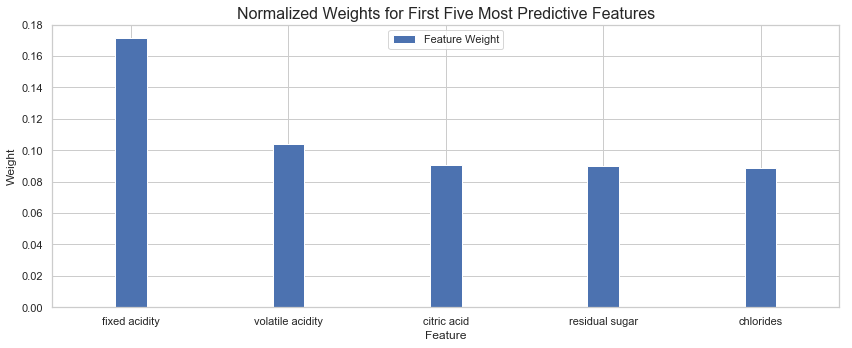

In [27]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train, df_wine.columns)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = RandomForestClassifier(max_depth=None, random_state=None)

# Create the parameters of base_estimators list you wish to tune, using a dictionary if needed.
"""
n_estimators: Numbers of trees in the forest
max_features: The number of features to consider when looking the best split
max_depth: The maximum depth of the tree
"""
parameters = {'n_estimators': [10, 20, 30], 'max_features': [3, 4, 5], 'max_depth': [5,6,7,None]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average='micro')

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(model, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameter using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_model = grid_fit.best_estimator_

# Make predictions using both models
predictions = (model.fit(X_train, y_train)).predict(X_test)
best_predictions = best_model.predict(X_test)

# Print results
print("Unoptimized model\n")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta=0.5, average='micro')))

print("\nOptimized model\n")
print(best_model)
print("Final Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5, average='micro')))


Unoptimized model

Accuracy score on testing data: 0.8071
F-score on testing data: 0.8071

Optimized model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Final Accuracy score on testing data: 0.8082
Final F-score on testing data: 0.8082


In [29]:
wine = [[8, 0.2, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 9.5]]

# Show prediction
for i, quality in enumerate(best_model.predict(wine)):
    print("Predicted quality for wine {} is {}".format(i+1, quality))
    
for i, quality in enumerate(best_model.predict(wine)):
    print("Predicted quality for wine {} is {}".format(i+1, quality))

Predicted quality for wine 1 is 2
Predicted quality for wine 1 is 2
